In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot as aligoplt

%matplotlib inline               
pykat.init_pykat_plotting(dpi=90)

from LLO import make_LLO2

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [6]:
base = make_LLO2(verbose=False, withSQZ=True)
base.parse("""
const Mitmy 39.420 
const Metmy 39.642
const Mitmx 39.603
const Metmx 39.508

attr ITMY mass $Mitmy zmech sus1
attr ETMY mass $Metmy zmech sus1
attr ITMX mass $Mitmx zmech sus1
attr ETMX mass $Metmx zmech sus1

tf sus1 1 0 p $mech_fres $mech_Q
const mech_fres 1
const mech_Q 1M
""")

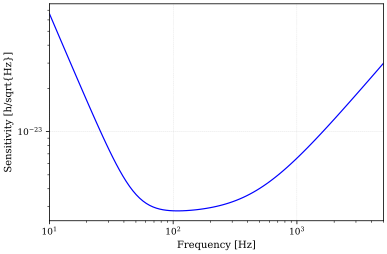

In [7]:
base1 = base.deepcopy()
base1 = aligo.setup(base1)
aligoplt.strain_sensitivity(base1, plot_cmds={'label':'after setup()'});

In [8]:
base1.DARM_lock.accuracy, base1.CARM_lock.accuracy, base1.PRCL_lock.accuracy, base1.SRCL_lock.accuracy, \
base1.MICH_lock.accuracy

(0.0034, 0.071, 2.1e-05, 0.015, 1.9e-05)

In [9]:
base2 = base.deepcopy()
base2 = aligo.setup(base2)
base2.DARM_lock.accuracy = 1e-6
base2.CARM_lock.accuracy = 1e-6
base2.PRCL_lock.accuracy = 1e-6
base2.SRCL_lock.accuracy = 1e-6
base2.MICH_lock.accuracy = 1e-6

base2.parse("qnoisedS NSR 1 $fs {node}".format(node=base2.IFO.DARM_h.port.nodeName[0]))
lower=5
upper=5000
steps=100
out = base2.IFO.DARM_h.scan_f(
        linlog="log", lower=lower, upper=upper, steps=steps)

np.save("./strain_sensitivityF2WithSQZ_0degs.npy", out["NSR"]) 

In [10]:
out["NSR"].mean()

2.5630495712155536e-23

In [7]:
2.1762047242901346e-23

2.1762047242901346e-23

In [16]:
base2.ITMX.zmech, base2.ITMX.zmech, base2.ITMX.zmech, base2.ITMX.zmech, 

(<AttrParam (ITMX.zmech=sus1) at 0x1249c64d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x1249c64d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x1249c64d0>,
 <AttrParam (ITMX.zmech=sus1) at 0x1249c64d0>)

In [17]:
base2.MICH_lock